In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [318]:
pd.pandas.set_option('display.max_columns', None)

In [319]:
df = pd.read_csv(r"C:\Users\gjadd\Desktop\GJ\All csv data science files\bank\bank-full.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [321]:
# No missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [322]:
print(df["job"].value_counts())
print()
print(df["marital"].value_counts())
print()
print(df["education"].value_counts())
print()
print(df["default"].value_counts())
print()
print(df["contact"].value_counts())
print()
print(df["poutcome"].value_counts())
print()
print(df["day"].value_counts().sort_index())
print()
print(df["month"].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

no     44396
yes      815
Name: default, dtype: int64

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

1      322
2     1293
3     1079
4     1445
5     1910
6     1932
7     1817
8     1842
9     1561
10     524
11    1479
12    1603
13    1585
14    1848
15    1703
16    1415
17    1939
18    2308
19    1757
20    2752
21    2026
22     905
23     939
24     447
25     840
26    1

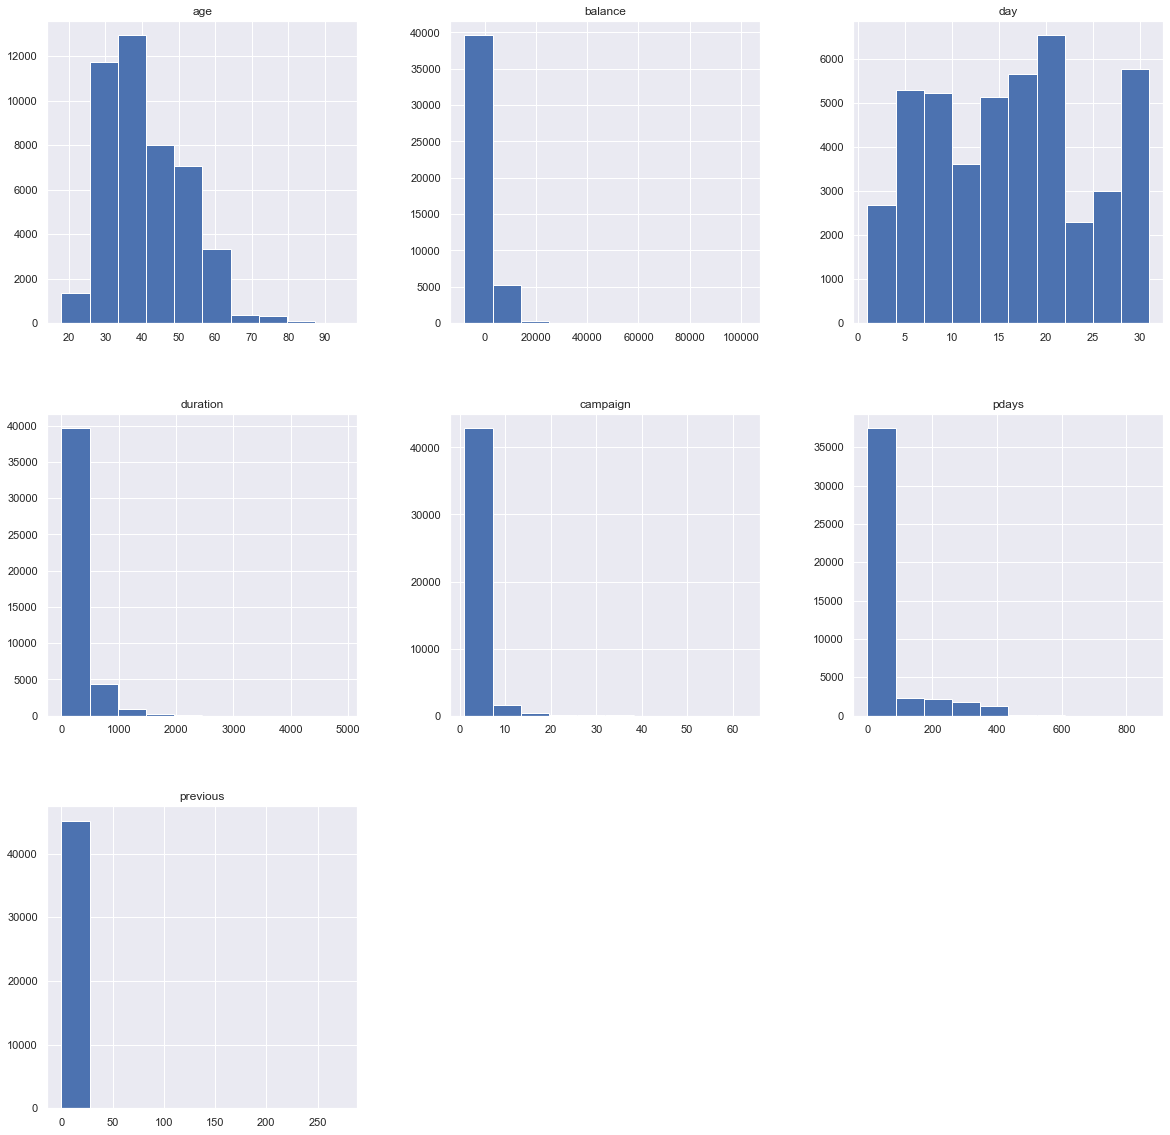

In [323]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.hist(bins=10, figsize=(20,20))
plt.show()

In [324]:
df[['pdays', 'campaign', 'previous']].describe()

,pdays,campaign,previous
count,45211.000000,45211.000000,45211.000000
mean,40.197828,2.763841,0.580323
std,100.128746,3.098021,2.303441
min,-1.000000,1.000000,0.000000
25%,-1.000000,1.000000,0.000000
50%,-1.000000,2.000000,0.000000
75%,-1.000000,3.000000,0.000000
max,871.000000,63.000000,275.000000


In [325]:
#Since 81% of pdays value is -1 with the rest of values being very noisy we drop this column
len(df[df['pdays'] == -1]) / len(df) * 100

81.73674548229414

In [326]:
# Around 66% of values in campaign are less than mean (with clear presence of outliers since max value of campaign is 63)
len(df[df['campaign'] < 2.76]) / len(df) * 100

66.46391364933312

In [327]:
# Around 81% of values in previous are equal to zero (with clear presence of outliers since max value of previous is 275)
len(df[df['previous'] == 0]) / len(df) * 100

81.73674548229414

In [328]:
#The rows where pdays == -1 and previous == 0 are same
len(df.query("pdays == -1 and previous == 0")) / len(df) * 100

81.73674548229414

In [329]:
print(np.median(df['campaign']))
print(np.median(df['previous']))

2.0
0.0


<AxesSubplot:ylabel='campaign'>

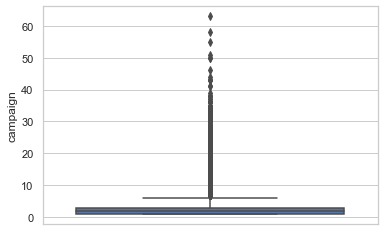

In [330]:
# Lot of Outliers
sns.set_style("whitegrid")
  
sns.boxplot(y = 'campaign', data = df)

<AxesSubplot:ylabel='previous'>

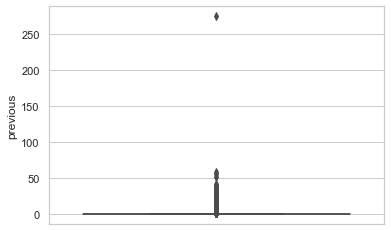

In [331]:
# Clear presence of outliers
sns.set_style("whitegrid")
  
sns.boxplot(y = 'previous', data = df)

#### Retired people and Management are the people with the most money in their balance account and are more likely to subscribe to a term deposit
#### Blue collar people and services have one of the least amount of money in their balance account and are less likely to subscribe to a term deposit

<AxesSubplot:xlabel='job', ylabel='balance'>

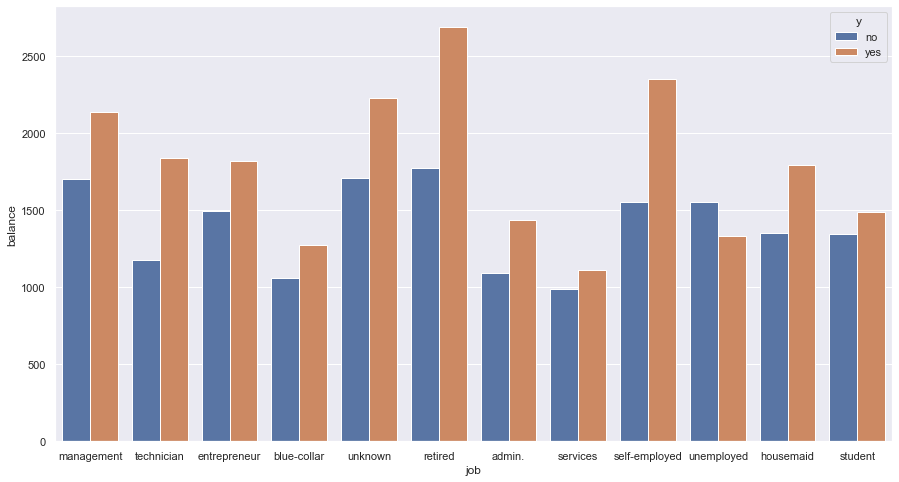

In [332]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x = 'job',
            y = 'balance',
            hue = 'y',
            data = df,
            ci = 0)

<AxesSubplot:xlabel='job', ylabel='Count'>

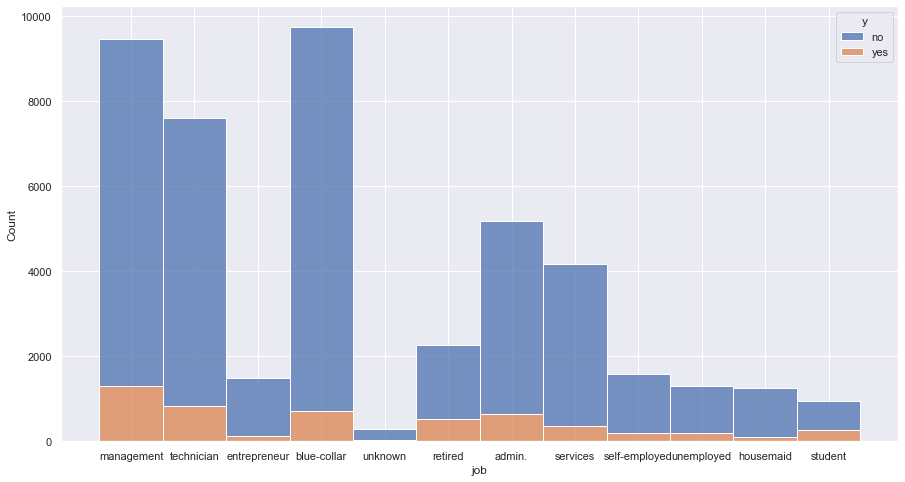

In [333]:
sns.histplot(binwidth=0.5, x="job", hue="y", data=df, stat="count", multiple="stack")

In [334]:
df['education'] = df['education'].replace('unknown','aunknown')
df.loc[df['education'] == 'aunknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3,47,blue-collar,married,aunknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,aunknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
13,58,technician,married,aunknown,no,71,yes,no,unknown,5,may,71,1,-1,0,unknown,no
16,45,admin.,single,aunknown,no,13,yes,no,unknown,5,may,98,1,-1,0,unknown,no
42,60,blue-collar,married,aunknown,no,104,yes,no,unknown,5,may,22,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45129,46,technician,married,aunknown,no,3308,no,no,cellular,27,oct,171,1,91,2,success,yes
45141,77,unknown,married,aunknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
45150,65,management,married,aunknown,no,2352,no,no,cellular,8,nov,354,3,188,13,success,no
45158,34,student,single,aunknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,no


In [335]:
df['job'] = df['job'].replace('unknown','aaunknown')
df.loc[df['job'] == 'aaunknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4,33,aaunknown,single,aunknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
216,47,aaunknown,married,aunknown,no,28,no,no,unknown,5,may,338,2,-1,0,unknown,no
354,59,aaunknown,divorced,aunknown,no,27,no,no,unknown,5,may,347,3,-1,0,unknown,no
876,37,aaunknown,single,aunknown,no,414,yes,no,unknown,7,may,131,1,-1,0,unknown,no
1072,29,aaunknown,single,primary,no,50,yes,no,unknown,7,may,50,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,aaunknown,married,tertiary,no,406,no,no,cellular,7,sep,314,1,-1,0,unknown,yes
44742,64,aaunknown,married,aunknown,no,2799,no,no,telephone,9,sep,378,4,-1,0,unknown,no
44970,28,aaunknown,single,aunknown,no,326,no,no,cellular,11,oct,450,1,231,1,success,yes
45141,77,aaunknown,married,aunknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no


In [336]:
df['contact'] = df['contact'].replace('unknown','aunknown')
df.loc[df['contact'] == 'aunknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,aunknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,aunknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,aunknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,aunknown,no,1506,yes,no,aunknown,5,may,92,1,-1,0,unknown,no
4,33,aaunknown,single,aunknown,no,1,no,no,aunknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,30,self-employed,single,secondary,no,1031,no,no,aunknown,20,oct,7,1,-1,0,unknown,no
45062,58,retired,married,primary,no,742,no,no,aunknown,20,oct,5,1,-1,0,unknown,no
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,aunknown,26,oct,17,1,-1,0,unknown,no
45135,53,blue-collar,married,primary,no,1294,no,no,aunknown,28,oct,71,1,-1,0,unknown,no


In [337]:
df['poutcome'] = df['poutcome'].replace('unknown','aunknown')
df.loc[df['poutcome'] == 'aunknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,aunknown,5,may,261,1,-1,0,aunknown,no
1,44,technician,single,secondary,no,29,yes,no,aunknown,5,may,151,1,-1,0,aunknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,aunknown,5,may,76,1,-1,0,aunknown,no
3,47,blue-collar,married,aunknown,no,1506,yes,no,aunknown,5,may,92,1,-1,0,aunknown,no
4,33,aaunknown,single,aunknown,no,1,no,no,aunknown,5,may,198,1,-1,0,aunknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,aunknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,aunknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,aunknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,aunknown,yes


In [338]:
#computing threshold as lower bound = (Q1–1.5*IQR), upper bound = (Q3+1.5*IQR)
def detect_outliers_iqr(df_column):
    data = df_column
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR) #lower bound is negative so we are not considering as our threshold as all values of campaign are positive
    upr_bound = q3+(1.5*IQR)
    print(upr_bound)
    
    perc = len(df[df['campaign'] >= upr_bound]) / len(df) * 100
    return perc
    
def detect_outliers_zscore(df_column, thres):
    count = 0
    mean = np.mean(df_column)
    std = np.std(df_column)
    # print(mean, std)
    for i in df_column:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            count = count + 1
    
    perc = count / len(df_column) * 100
    return perc
    
print("Percentage of points that are outliers according to z score (with threshold=2) for campaign", detect_outliers_zscore(df['campaign'], 2))
print("Percentage of points that are outliers according to inter-quartile range for campaign", detect_outliers_iqr(df['campaign']))
print("Percentage of points that are outliers according to z score (with threshold=2) for previous", detect_outliers_zscore(df['previous'], 2))
print("Percentage of points that are outliers according to inter-quartile range for previous", detect_outliers_iqr(df['previous']))

Percentage of points that are outliers according to z score (with threshold=2) for campaign 3.957001614651302
6.0
Percentage of points that are outliers according to inter-quartile range for campaign 9.632611532591625
Percentage of points that are outliers according to z score (with threshold=2) for previous 2.3534095684678507
0.0
Percentage of points that are outliers according to inter-quartile range for previous 100.0


In [339]:
def imputation(row_name, column_name, threshold, df, tp):
    if tp == 'i':
        if row_name[column_name] <= threshold:
            return row_name[column_name]
        else:
            median = df[df[column_name] <= threshold][column_name].median() #treating outliers with median of points which are less than threshold
            return median
        
    elif tp == 'z':
        mean = np.mean(df[column_name])
        std = np.std(df[column_name])
        z_score = (row_name[column_name]-mean)/std
        
        if (np.abs(z_score) <= threshold):
            return row_name[column_name]
        else:
            return 0 #which is the median

def clean_df(df):
    df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
    df['default'] = df['default'].map({'yes': 1, 'no': 0})
    df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
    #df['education'] = df['education'].map({'tertiary': 2, 'secondary': 1, 'primary': 0})
    df['month'] = df['month'].map({'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11})
    df['month_sin'] = np.sin((df.month)*(2.*np.pi/12))
    df['month_cos'] = np.cos((df.month)*(2.*np.pi/12))
    df['y'] = df['y'].map({'yes': 1, 'no': 0})
    
    #threshhold got from upper bound of inter quartile range
    df['campaign_iqr'] = df.apply(lambda row: imputation(row, 'campaign', 6, df, 'i'),axis=1)
    df['previous_iqr'] = df.apply(lambda row: imputation(row, 'previous', 3, df, 'z'),axis=1)
    print(df['campaign_iqr'][0])
    print(df['previous_iqr'][0])

In [340]:
all_df = pd.get_dummies(data=df, columns=['job', 'marital', 'contact', 'poutcome', 'education'], drop_first=True, dummy_na=False)

In [341]:
selected_df = pd.get_dummies(data=df, columns=['job', 'contact', 'poutcome', 'education'], drop_first=True, dummy_na=False)
selected_df = pd.get_dummies(data=selected_df, columns=['marital'], dummy_na=False)

In [342]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#le.fit_transform(selected_df["education"])

In [343]:
cleaned_df = all_df.copy()

In [344]:
clean_df(cleaned_df)
clean_df(selected_df)

1.0
0.0
1.0
0.0


In [345]:
cleaned_df = cleaned_df.drop(columns = ['pdays', 'campaign', 'previous', 'month'], axis=1)
selected_df = selected_df.drop(columns = ['pdays', 'campaign', 'previous', 'month'], axis=1)

In [346]:
cleaned_df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'education_primary', 'education_secondary', 'education_tertiary',
       'month_sin', 'month_cos', 'campaign_iqr', 'previous_iqr'],
      dtype='object')

In [347]:
selected_df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'education_primary', 'education_secondary',
       'education_tertiary', 'marital_divorced', 'marital_married',
       'marital_single', 'month_sin', 'month_cos', 'campaign_iqr',
       'previous_iqr'],
      dtype='object')

In [348]:
cleaned_df

,age,default,balance,housing,loan,day,duration,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,education_primary,education_secondary,education_tertiary,month_sin,month_cos,campaign_iqr,previous_iqr
0,58,0,2143,1,0,5,261,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.866025,-0.5,1.0,0.0
1,44,0,29,1,0,5,151,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0.866025,-0.5,1.0,0.0
2,33,0,2,1,1,5,76,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0.866025,-0.5,1.0,0.0
3,47,0,1506,1,0,5,92,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.866025,-0.5,1.0,0.0
4,33,0,1,0,0,5,198,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.866025,-0.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,-0.866025,0.5,3.0,0.0
45207,71,0,1729,0,0,17,456,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,-0.866025,0.5,2.0,0.0
45208,72,0,5715,0,0,17,1127,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,-0.866025,0.5,5.0,3.0
45209,57,0,668,0,0,17,508,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,-0.866025,0.5,4.0,0.0


In [349]:
selected_df

,age,default,balance,housing,loan,day,duration,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success,education_primary,education_secondary,education_tertiary,marital_divorced,marital_married,marital_single,month_sin,month_cos,campaign_iqr,previous_iqr
0,58,0,2143,1,0,5,261,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.866025,-0.5,1.0,0.0
1,44,0,29,1,0,5,151,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0.866025,-0.5,1.0,0.0
2,33,0,2,1,1,5,76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.866025,-0.5,1.0,0.0
3,47,0,1506,1,0,5,92,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.866025,-0.5,1.0,0.0
4,33,0,1,0,0,5,198,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.866025,-0.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,-0.866025,0.5,3.0,0.0
45207,71,0,1729,0,0,17,456,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,-0.866025,0.5,2.0,0.0
45208,72,0,5715,0,0,17,1127,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,-0.866025,0.5,5.0,3.0
45209,57,0,668,0,0,17,508,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,-0.866025,0.5,4.0,0.0


In [350]:
cleaned_df[["month_sin", "month_cos"]].value_counts()

month_sin      month_cos    
 8.660254e-01  -5.000000e-01    13766
 1.224647e-16  -1.000000e+00     6895
-5.000000e-01  -8.660254e-01     6247
 5.000000e-01  -8.660254e-01     5341
-8.660254e-01   5.000000e-01     3970
 1.000000e+00   6.123234e-17     2932
 5.000000e-01   8.660254e-01     2649
 0.000000e+00   1.000000e+00     1403
-1.000000e+00  -1.836970e-16      738
-8.660254e-01  -5.000000e-01      579
 8.660254e-01   5.000000e-01      477
-5.000000e-01   8.660254e-01      214
dtype: int64

<AxesSubplot:ylabel='campaign_iqr'>

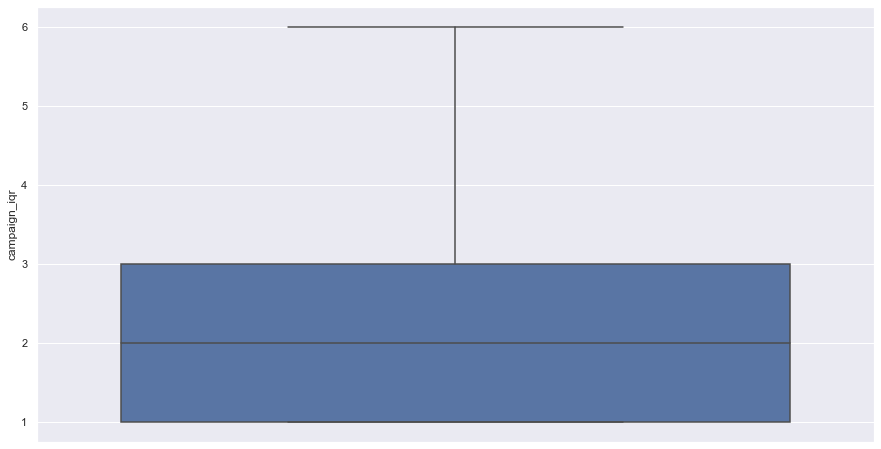

In [351]:
sns.boxplot(y='campaign_iqr', data=cleaned_df)

<AxesSubplot:ylabel='previous_iqr'>

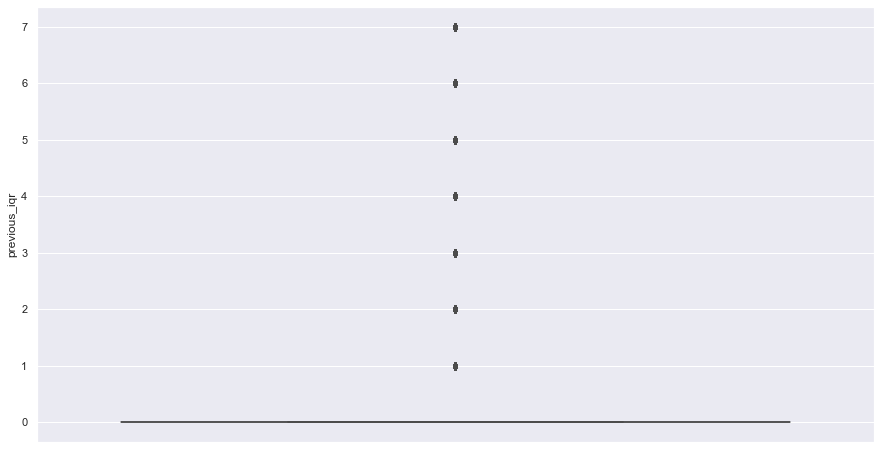

In [352]:
sns.boxplot(y='previous_iqr', data=cleaned_df)

In [353]:
corr_matrix = cleaned_df.corr()
corr_matrix['y'].sort_values(ascending=False)

y                      1.000000
duration               0.394521
poutcome_success       0.306788
previous_iqr           0.144997
contact_cellular       0.135873
month_cos              0.084856
job_retired            0.079245
job_student            0.076897
education_tertiary     0.066448
marital_single         0.063526
balance                0.052838
job_management         0.032919
poutcome_other         0.031955
age                    0.025155
job_unemployed         0.020390
contact_telephone      0.014042
poutcome_failure       0.009885
job_admin.             0.005637
job_self-employed      0.000855
job_technician        -0.008970
job_housemaid         -0.015195
job_entrepreneur      -0.019662
default               -0.022419
job_services          -0.027864
day                   -0.028348
education_secondary   -0.036388
education_primary     -0.040393
month_sin             -0.058145
marital_married       -0.060260
campaign_iqr          -0.063071
loan                  -0.068185
job_blue

In [354]:
corr_matrix = selected_df.corr()
corr_matrix['y'].sort_values(ascending=False)

y                      1.000000
duration               0.394521
poutcome_success       0.306788
previous_iqr           0.144997
contact_cellular       0.135873
month_cos              0.084856
job_retired            0.079245
job_student            0.076897
education_tertiary     0.066448
marital_single         0.063526
balance                0.052838
job_management         0.032919
poutcome_other         0.031955
age                    0.025155
job_unemployed         0.020390
contact_telephone      0.014042
poutcome_failure       0.009885
job_admin.             0.005637
marital_divorced       0.002772
job_self-employed      0.000855
job_technician        -0.008970
job_housemaid         -0.015195
job_entrepreneur      -0.019662
default               -0.022419
job_services          -0.027864
day                   -0.028348
education_secondary   -0.036388
education_primary     -0.040393
month_sin             -0.058145
marital_married       -0.060260
campaign_iqr          -0.063071
loan    

In [355]:
X = cleaned_df.drop(columns = 'y')
y = cleaned_df[['y']]
X_selected = selected_df.drop(columns = 'y')
y_selected = selected_df[['y']]

In [356]:
TEST_SIZE = 0.2
RAND_STATE = 42

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RAND_STATE)
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size = TEST_SIZE, random_state=RAND_STATE)

In [358]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# numerical features
num_cols = ['age', 'balance', 'day', 'duration', 'campaign_iqr', 'previous_iqr']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column (on the training set's scale)
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [359]:
from sklearn.preprocessing import StandardScaler

# copy of datasets
X_train_stand_selected = X_train_selected.copy()
X_test_stand_selected = X_test_selected.copy()

# numerical features
num_cols = ['age', 'balance', 'day', 'duration', 'campaign_iqr', 'previous_iqr']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand_selected[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand_selected[[i]])
    
    # transform the testing data column (on the training set's scale)
    X_test_stand[i] = scale.transform(X_test_stand_selected[[i]])

In [360]:
#Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train,y_train.values.ravel())

y_train_preds = gnb.predict(X_train)
y_test_preds = gnb.predict(X_test)

print('GNB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

GNB accuracy score for train: 0.852: test: 0.849


In [361]:
#Naive Bayes for selected df
gnb_selected = GaussianNB()
gnb_selected.fit(X_train_selected,y_train_selected.values.ravel())

y_train_preds_selected = gnb_selected.predict(X_train_selected)
y_test_preds_selected = gnb_selected.predict(X_test_selected)

print('GNB accuracy score (selected df) for train: %.3f: test: %.3f' % (
        accuracy_score(y_train_selected, y_train_preds_selected),
        accuracy_score(y_test_selected, y_test_preds_selected)))

GNB accuracy score (selected df) for train: 0.852: test: 0.849


In [362]:
#XGBoost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)

y_train_preds = xgb.predict(X_train)
#y_test_preds = xgb.predict([[58, 0, 2143, 1, 0, 5, 261, 0, 0, 0]])
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train: 0.955: test: 0.904


In [363]:
#XGBoost for selected df
xgb_selected = xgboost.XGBClassifier()
xgb_selected.fit(X_train_selected,y_train_selected)

y_train_preds_selected = xgb_selected.predict(X_train_selected)
y_test_preds_selected = xgb_selected.predict(X_test_selected)

print('XGB accuracy score (selected df) for train: %.3f: test: %.3f' % (
        accuracy_score(y_train_selected, y_train_preds_selected),
        accuracy_score(y_test_selected, y_test_preds_selected)))

xgb_selected.save_model("xgb_model_selected_sklearn.json")

XGB accuracy score (selected df) for train: 0.956: test: 0.904


In [364]:
#Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train.values.ravel())

y_train_preds = rfc.predict(X_train)
y_test_preds = rfc.predict(X_test)

print('RFC accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

RFC accuracy score for train: 1.000: test: 0.901


In [365]:
#Random Forest for selected df
rfc_selected = RandomForestClassifier()
rfc_selected.fit(X_train_selected,y_train_selected.values.ravel())

y_train_preds_selected = rfc_selected.predict(X_train_selected)
y_test_preds_selected = rfc_selected.predict(X_test_selected)

print('RFC accuracy score (selected df) for train: %.3f: test: %.3f' % (
        accuracy_score(y_train_selected, y_train_preds_selected),
        accuracy_score(y_test_selected, y_test_preds_selected)))

RFC accuracy score (selected df) for train: 1.000: test: 0.904


In [366]:
#SVM
svc = SVC()
svc.fit(X_train_stand,y_train.values.ravel())

y_train_preds = svc.predict(X_train_stand)
y_test_preds = svc.predict(X_test_stand)

print('SVM accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

SVM accuracy score for train: 0.911: test: 0.898


In [367]:
#SVM for selected df
svc_selected = SVC()
svc_selected.fit(X_train_stand_selected,y_train_selected.values.ravel())

y_train_preds_selected = svc_selected.predict(X_train_stand_selected)
y_test_preds_selected = svc_selected.predict(X_test_stand_selected)

print('SVM accuracy score (selected df) for train: %.3f: test: %.3f' % (
        accuracy_score(y_train_selected, y_train_preds_selected),
        accuracy_score(y_test_selected, y_test_preds_selected)))

SVM accuracy score (selected df) for train: 0.884: test: 0.879


In [368]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_stand,y_train.values.ravel())

y_train_preds = knn.predict(X_train_stand)
y_test_preds = knn.predict(X_test_stand)

print('KNN accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

KNN accuracy score for train: 0.920: test: 0.892


In [369]:
#KNN for selected df
knn_selected = KNeighborsClassifier(n_neighbors=5)
knn_selected.fit(X_train_stand_selected,y_train_selected.values.ravel())

y_train_preds_selected = knn_selected.predict(X_train_stand_selected)
y_test_preds_selected = knn_selected.predict(X_test_stand_selected)

print('KNN accuracy score (selected df) for train: %.3f: test: %.3f' % (
        accuracy_score(y_train_selected, y_train_preds_selected),
        accuracy_score(y_test_selected, y_test_preds_selected)))

KNN accuracy score (selected df) for train: 0.906: test: 0.875


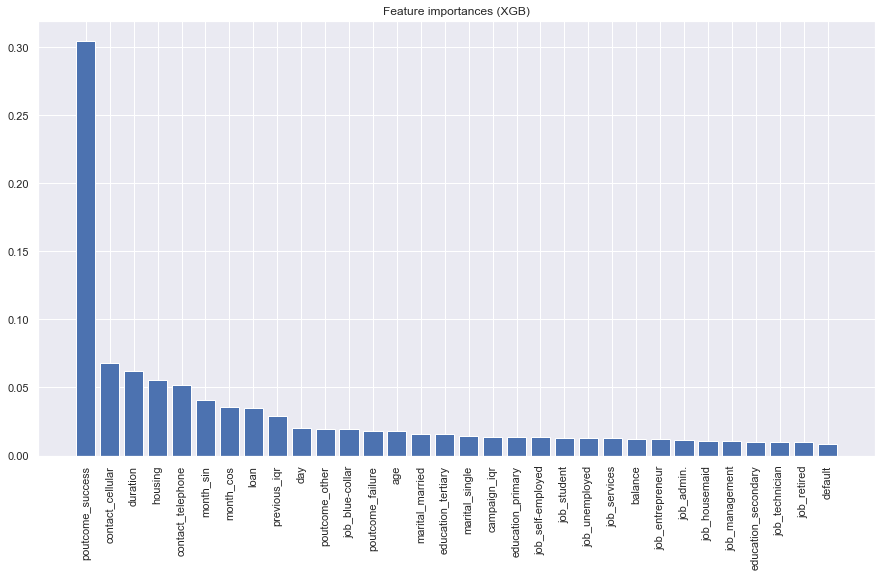

In [370]:
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

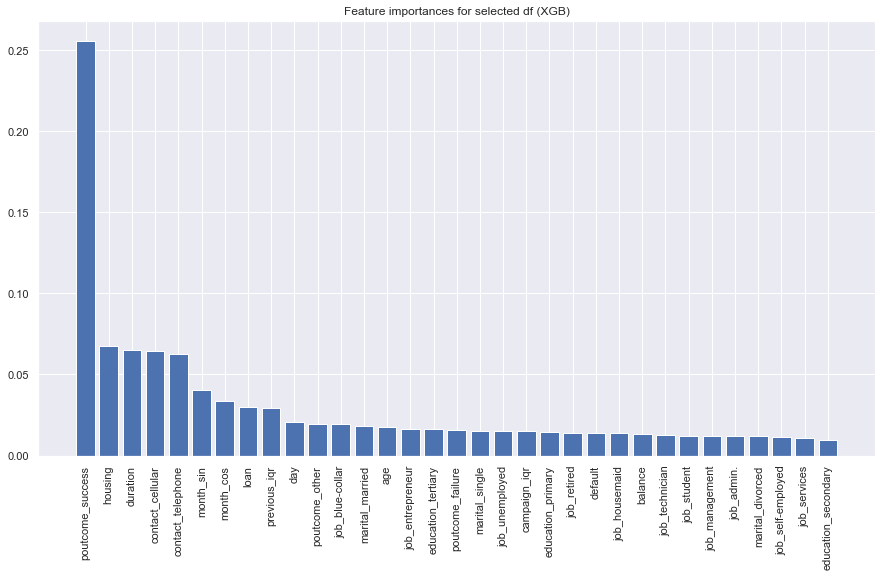

In [371]:
headers = ["name", "score"]
values = sorted(zip(X_train_selected.columns, xgb_selected.feature_importances_), key=lambda x: x[1] * -1)
xgb_selected_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos_selected = np.arange(0, len(xgb_selected_feature_importances))
plt.bar(x_pos_selected, xgb_selected_feature_importances['score'])
plt.xticks(x_pos_selected, xgb_selected_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances for selected df (XGB)')

plt.show()